<h2>Начнем с загрузки датасета. Посмотрим, что в непм находится</h2>


In [2]:
import pandas as pd


data = pd.read_csv("train_dataset_bank.csv", encoding='cp1252', sep=';')
data.head()

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,...,MANAGERCOUNTINREGION,MANAGERINNCOUNT,OKVED_CODE,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME
0,1,1847,01JAN2018:00:00:00,0,0,1.298961e+09,2154000.0,1.125573e+09,NaN,150010000.0,NaN,21224000.0,1.048287e+10,105901000.0,127510000.0,9.477348e+09,440671000.0,3.312980e+08,138000.0,1.960896e+09,1.000700e+07,-46634000.0,599497000.0,500000.0,1.028878e+09,340135000.0,NaN,340135000.0,NaN,9.480796e+09,2.499973e+09,6.907960e+09,NaN,NaN,1.178183e+10,1.178183e+10,2.370882e+09,5.294104e+10,5.057016e+10,631752000.0,...,0.0,0.0,35.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4770,01JAN2018:00:00:00,0,0,7.337400e+07,NaN,7.337400e+07,NaN,NaN,NaN,NaN,2.161000e+07,2378000.0,NaN,1.764200e+07,1000000.0,5.530000e+05,37000.0,9.073600e+07,1.000000e+05,NaN,6780000.0,NaN,8.385600e+07,NaN,NaN,NaN,NaN,4.248000e+06,NaN,4.171000e+06,77000.0,NaN,9.498400e+07,9.498400e+07,9.315000e+06,5.218400e+07,4.286900e+07,2569000.0,...,1.0,1.0,36.00.2,6.0,2762852.0,1.0,794.0,3.0,21.0,5408695.0,39.0,882647.0,4.0,1.0,0.0,1.0,1.0,1174998.0,2.0,0.0,2.0,2.0,2738217.0,38.0,0.0,38.0,39.0,4209963.0,169.0,0.0,169.0,168.0,18351739.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,4,12237,01JAN2018:00:00:00,0,0,1.937488e+09,122828000.0,6.103280e+08,NaN,809426000.0,356828000.0,38078000.0,5.786965e+09,12001000.0,71000.0,1.232486e+09,78603000.0,4.459193e+09,4611000.0,2.685905e+09,1.516514e+09,NaN,NaN,65834000.0,1.103557e+09,627253000.0,NaN,689000.0,626564000.0,4.411295e+09,3.930000e+05,3.092581e+09,NaN,NaN,7.724453e+09,7.724453e+09,1.694054e+10,4.028466e+10,2.334412e+10,931118000.0,...,1.0,1.0,35.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p>В данном датасете 124 колонки. Как видно по первым пяти строкам, есть очень много пропусков. Оценим их количество</p>

In [3]:
print(data.isna().sum().to_list())

[0, 0, 0, 0, 0, 10955, 16471, 11550, 17545, 16392, 15391, 16371, 6041, 8156, 14593, 6407, 15035, 6281, 13529, 6041, 10187, 17794, 16933, 16522, 10396, 13675, 15475, 15603, 17160, 6277, 12633, 6413, 17139, 16990, 6021, 6022, 10341, 6444, 6943, 6386, 13235, 14937, 6361, 17590, 14971, 14388, 10426, 7184, 6381, 8938, 12149, 8081, 16053, 13179, 8134, 8082, 8509, 8015, 13738, 15484, 7994, 15185, 14690, 7997, 3500, 1334, 3500, 3500, 3503, 1332, 1336, 1339, 1343, 3980, 1337, 1428, 3596, 3596, 3596, 3596, 3596, 3596, 3500, 3500, 3500, 3500, 1199, 13959, 13959, 13959, 13959, 13959, 12749, 12749, 12749, 12749, 12749, 13595, 13595, 13595, 13595, 13595, 12665, 12665, 12665, 12665, 12665, 11560, 11560, 11560, 11560, 11560, 11107, 11107, 11107, 11107, 11107, 17886, 17652, 16382, 16472, 16472, 15723, 15763]


<p>Пропуски присутсвуют почти в каждом столбце. Попробуем избавить от пропусков.</p>

<h2>Заполняем пропуски</h2>
<p>При просмотре всех столбцов в таблице было выявлено большое количесвто похожих столбцов, которые обозначают одно и тоже или относятся к одному и тому же. Вместо удаления или заполнения пропусков попробуем сначала объединить похожие столбцы в один новый и удалить старые. Так получится избавится от некоторого количества пропусков в данных</p>



1.   Объединим все столбцы, которые содержат слово "активы" в один.




In [4]:
data1 = data.copy()

data1['Actives'] = data[['F1100', 'F1110', 'F1180', 'F1190', 'F1200', 'F1260']].sum(axis=1)

data1['Actives'].isna().sum()


0

In [5]:
data1 = data1.drop(columns=['F1100', 'F1110', 'F1180', 'F1190', 'F1200', 'F1260'])
data1

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1150,F1160,F1170,F1210,F1220,F1230,F1240,F1250,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,F2220,F2300,F2310,F2320,F2330,...,MANAGERINNCOUNT,OKVED_CODE,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME,Actives
0,1,1847,01JAN2018:00:00:00,0,0,1.125573e+09,NaN,150010000.0,105901000.0,127510000.0,9.477348e+09,440671000.0,3.312980e+08,1.960896e+09,1.000700e+07,-46634000.0,599497000.0,500000.0,1.028878e+09,340135000.0,NaN,340135000.0,NaN,9.480796e+09,2.499973e+09,6.907960e+09,NaN,NaN,1.178183e+10,1.178183e+10,2.370882e+09,5.294104e+10,5.057016e+10,631752000.0,1.083075e+09,656055000.0,8.834700e+07,NaN,106919000.0,293404000.0,...,0.0,35.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.180534e+10
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
2,3,4770,01JAN2018:00:00:00,0,0,7.337400e+07,NaN,NaN,2378000.0,NaN,1.764200e+07,1000000.0,5.530000e+05,9.073600e+07,1.000000e+05,NaN,6780000.0,NaN,8.385600e+07,NaN,NaN,NaN,NaN,4.248000e+06,NaN,4.171000e+06,77000.0,NaN,9.498400e+07,9.498400e+07,9.315000e+06,5.218400e+07,4.286900e+07,2569000.0,NaN,6746000.0,1.190000e+06,NaN,50000.0,NaN,...,1.0,36.00.2,6.0,2762852.0,1.0,794.0,3.0,21.0,5408695.0,39.0,882647.0,4.0,1.0,0.0,1.0,1.0,1174998.0,2.0,0.0,2.0,2.0,2738217.0,38.0,0.0,38.0,39.0,4209963.0,169.0,0.0,169.0,168.0,18351739.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,9.502100e+07
3,4,12237,01JAN2018:00:00:00,0,0,6.103280e+08,NaN,809426000.0,12001000.0,71000.0,1.232486e+09,78603000.0,4.459193e+09,2.685905e+09,1.516514e+09,NaN,NaN,65834000.0,1.103557e+09,627253000.0,NaN,689000.0,626564000.0,4.411295e+09,3.930000e+05,3.092581e+09,NaN,NaN,7.724453e+09,7.724453e+09,1.694054e+10,4.028466e+10,2.334412e+10,931118000.0,1.600942e+10,NaN,1.489204e+09,263181000.0,351956000.0,5361000.0,...,1.0,35.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.246798e+09
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17886,17887,3439,07APR2019:00:00:00,0,0,5.404500e+07,NaN,NaN,158000.0,NaN,2.550500e+07,NaN,2.439000e+06,7.192800e+07,1.281000e+06,NaN,61939000.0,1449000.0,7.259000e+06,NaN,NaN,NaN,NaN,1.021900e+07,NaN


2.   Объединим все столбцы, которые содержат слово "задолженность" в один



In [6]:
data1['Debt_all'] = data[['F1230', 'F1250', 'F1520']].sum(axis=1)

data1['Debt_all'].isna().sum()

0

In [7]:
data1['Debt_previous'] = data[['F1230_LAG1', 'F1520_LAG1']].sum(axis=1)
data1['Debt_previous'].isna().sum()

0

In [8]:
data1 = data1.drop(columns=['F1230', 'F1250', 'F1520', 'F1230_LAG1', 'F1520_LAG1'])
data1

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1150,F1160,F1170,F1210,F1220,F1240,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,F2220,F2300,F2310,F2320,F2330,F2340,F2350,F2400,...,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME,Actives,Debt_all,Debt_previous
0,1,1847,01JAN2018:00:00:00,0,0,1.125573e+09,NaN,150010000.0,105901000.0,127510000.0,440671000.0,1.960896e+09,1.000700e+07,-46634000.0,599497000.0,500000.0,1.028878e+09,340135000.0,NaN,340135000.0,NaN,9.480796e+09,2.499973e+09,NaN,NaN,1.178183e+10,1.178183e+10,2.370882e+09,5.294104e+10,5.057016e+10,631752000.0,1.083075e+09,656055000.0,8.834700e+07,NaN,106919000.0,293404000.0,1.122418e+09,1.479338e+09,3.908700e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.180534e+10,1.671661e+10,1.660556e+10
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
2,3,4770,01JAN2018:00:00:00,0,0,7.337400e+07,NaN,NaN,2378000.0,NaN,1000000.0,9.073600e+07,1.000000e+05,NaN,6780000.0,NaN,8.385600e+07,NaN,NaN,NaN,NaN,4.248000e+06,NaN,77000.0,NaN,9.498400e+07,9.498400e+07,9.315000e+06,5.218400e+07,4.286900e+07,2569000.0,NaN,6746000.0,1.190000e+06,NaN,50000.0,NaN,6.500000e+04,1.494000e+06,6.550000e+05,...,6.0,2762852.0,1.0,794.0,3.0,21.0,5408695.0,39.0,882647.0,4.0,1.0,0.0,1.0,1.0,1174998.0,2.0,0.0,2.0,2.0,2738217.0,38.0,0.0,38.0,39.0,4209963.0,169.0,0.0,169.0,168.0,18351739.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,9.502100e+07,2.236600e+07,2.202100e+07
3,4,12237,01JAN2018:00:00:00,0,0,6.103280e+08,NaN,809426000.0,12001000.0,71000.0,78603000.0,2.685905e+09,1.516514e+09,NaN,NaN,65834000.0,1.103557e+09,627253000.0,NaN,689000.0,626564000.0,4.411295e+09,3.930000e+05,NaN,NaN,7.724453e+09,7.724453e+09,1.694054e+10,4.028466e+10,2.334412e+10,931118000.0,1.600942e+10,NaN,1.489204e+09,263181000.0,351956000.0,5361000.0,1.283591e+09,1.335281e+09,1.102019e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.246798e+09,8.784260e+09,5.386288e+09
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17886,17887,3439,07APR2019:00:00:00,0,0,5.404500e+07,NaN,NaN,158000.0,NaN,NaN,7.192800e+07,1.281000e+06,NaN,61939000.0,144

3. Объединим столбцы, в названии которых есть слово "прибыль"



In [9]:
data1['Profit'] = data[['F1370', 'F2100', 'F2200', 'F2300', 'F2400', ]].sum(axis=1)
data1['Profit'].isna().sum()

0

In [10]:
data1['Profit_previous'] = data[['F2200_LAG1', 'F2300_LAG1', 'F2400_LAG1', ]].sum(axis=1)
data1['Profit_previous'].isna().sum()

0

In [11]:
data1 = data1.drop(columns=['F1370', 'F2100', 'F2200', 'F2300', 'F2400', 'F2200_LAG1', 'F2300_LAG1', 'F2400_LAG1'])
data1

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1150,F1160,F1170,F1210,F1220,F1240,F1300,F1310,F1320,F1350,F1360,F1400,F1410,F1420,F1450,F1500,F1510,F1530,F1550,F1600,F1700,F2110,F2120,F2210,F2220,F2310,F2320,F2330,F2340,F2350,F2410,F1150_LAG1,F1410_LAG1,F1510_LAG1,F2110_LAG1,...,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME,Actives,Debt_all,Debt_previous,Profit,Profit_previous
0,1,1847,01JAN2018:00:00:00,0,0,1.125573e+09,NaN,150010000.0,105901000.0,127510000.0,440671000.0,1.960896e+09,1.000700e+07,-46634000.0,599497000.0,500000.0,340135000.0,NaN,340135000.0,NaN,9.480796e+09,2.499973e+09,NaN,NaN,1.178183e+10,1.178183e+10,5.294104e+10,5.057016e+10,1.083075e+09,656055000.0,NaN,106919000.0,293404000.0,1.122418e+09,1.479338e+09,-19204000.0,1.031700e+09,NaN,2.112180e+09,4.955724e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.180534e+10,1.671661e+10,1.660556e+10,4.158946e+09,8.728800e+08
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,3,4770,01JAN2018:00:00:00,0,0,7.337400e+07,NaN,NaN,2378000.0,NaN,1000000.0,9.073600e+07,1.000000e+05,NaN,6780000.0,NaN,NaN,NaN,NaN,NaN,4.248000e+06,NaN,77000.0,NaN,9.498400e+07,9.498400e+07,5.218400e+07,4.286900e+07,NaN,6746000.0,NaN,50000.0,NaN,6.500000e+04,1.494000e+06,NaN,7.067400e+07,NaN,NaN,5.134000e+07,...,1.0,794.0,3.0,21.0,5408695.0,39.0,882647.0,4.0,1.0,0.0,1.0,1.0,1174998.0,2.0,0.0,2.0,2.0,2738217.0,38.0,0.0,38.0,39.0,4209963.0,169.0,0.0,169.0,168.0,18351739.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,9.502100e+07,2.236600e+07,2.202100e+07,9.758500e+07,5.194000e+06
3,4,12237,01JAN2018:00:00:00,0,0,6.103280e+08,NaN,809426000.0,12001000.0,71000.0,78603000.0,2.685905e+09,1.516514e+09,NaN,NaN,65834000.0,627253000.0,NaN,689000.0,626564000.0,4.411295e+09,3.930000e+05,NaN,NaN,7.724453e+09,7.724453e+09,4.028466e+10,2.334412e+10,1.600942e+10,NaN,263181000.0,351956000.0,5361000.0,1.283591e+09,1.335281e+09,256172000.0,5.929800e+08,NaN,2.780000e+05,3.873078e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.246798e+09,8.784260e+09,5.386288e+09,2.156644e+10,3.759071e+09
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17886,17887,3439,07APR2019:00:00:00,0,0,5.404500e+07,NaN,NaN,158000.0,NaN,NaN,7.192

4. Объедини столбцы, которые содержат слово "средства"

In [12]:
data1['Money'] = data[['F1150', 'F1410', 'F1510', ]].sum(axis=1)
data1['Money'].isna().sum()

0

In [13]:
data1['Money_previous'] = data[['F1150_LAG1', 'F1410_LAG1', 'F1510_LAG1', ]].sum(axis=1)
data1['Money_previous'].isna().sum()

0

In [14]:
data1 = data1.drop(columns=['F1150', 'F1410', 'F1510', 'F1150_LAG1', 'F1410_LAG1', 'F1510_LAG1'])
data1

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1160,F1170,F1210,F1220,F1240,F1300,F1310,F1320,F1350,F1360,F1400,F1420,F1450,F1500,F1530,F1550,F1600,F1700,F2110,F2120,F2210,F2220,F2310,F2320,F2330,F2340,F2350,F2410,F2110_LAG1,F2120_LAG1,F2210_LAG1,F2220_LAG1,F2320_LAG1,F2330_LAG1,EGRPOINCLUDED,...,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME,Actives,Debt_all,Debt_previous,Profit,Profit_previous,Money,Money_previous
0,1,1847,01JAN2018:00:00:00,0,0,NaN,150010000.0,105901000.0,127510000.0,440671000.0,1.960896e+09,1.000700e+07,-46634000.0,599497000.0,500000.0,340135000.0,340135000.0,NaN,9.480796e+09,NaN,NaN,1.178183e+10,1.178183e+10,5.294104e+10,5.057016e+10,1.083075e+09,656055000.0,NaN,106919000.0,293404000.0,1.122418e+09,1.479338e+09,-19204000.0,4.955724e+10,4.648680e+10,1.424790e+09,1.089145e+09,137626000.0,310096000.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.180534e+10,1.671661e+10,1.660556e+10,4.158946e+09,8.728800e+08,3.625546e+09,3.143880e+09
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,3,4770,01JAN2018:00:00:00,0,0,NaN,NaN,2378000.0,NaN,1000000.0,9.073600e+07,1.000000e+05,NaN,6780000.0,NaN,NaN,NaN,NaN,4.248000e+06,77000.0,NaN,9.498400e+07,9.498400e+07,5.218400e+07,4.286900e+07,NaN,6746000.0,NaN,50000.0,NaN,6.500000e+04,1.494000e+06,NaN,5.134000e+07,4.299900e+07,NaN,5.092000e+06,NaN,NaN,1.0,...,3.0,21.0,5408695.0,39.0,882647.0,4.0,1.0,0.0,1.0,1.0,1174998.0,2.0,0.0,2.0,2.0,2738217.0,38.0,0.0,38.0,39.0,4209963.0,169.0,0.0,169.0,168.0,18351739.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,9.502100e+07,2.236600e+07,2.202100e+07,9.758500e+07,5.194000e+06,7.337400e+07,7.067400e+07
3,4,12237,01JAN2018:00:00:00,0,0,NaN,809426000.0,12001000.0,71000.0,78603000.0,2.685905e+09,1.516514e+09,NaN,NaN,65834000.0,627253000.0,689000.0,626564000.0,4.411295e+09,NaN,NaN,7.724453e+09,7.724453e+09,4.028466e+10,2.334412e+10,1.600942e+10,NaN,263181000.0,351956000.0,5361000.0,1.283591e+09,1.335281e+09,256172000.0,3.873078e+10,2.170760e+10,1.599046e+10,NaN,323728000.0,1744000.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.246798e+09,8.784260e+09,5.386288e+09,2.156644e+10,3.759071e+09,6.107210e+08,5.932580e+08
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

5. Объединим столбцы, которые содержат слово "капитал" в один



In [15]:
data1['Capital'] = data[['F1300', 'F1310', 'F1350', 'F1360']].sum(axis=1)
data1['Capital'].isna().sum()

0

In [16]:
data1 = data1.drop(columns=['F1300', 'F1310', 'F1350', 'F1360'])
data1

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1160,F1170,F1210,F1220,F1240,F1320,F1400,F1420,F1450,F1500,F1530,F1550,F1600,F1700,F2110,F2120,F2210,F2220,F2310,F2320,F2330,F2340,F2350,F2410,F2110_LAG1,F2120_LAG1,F2210_LAG1,F2220_LAG1,F2320_LAG1,F2330_LAG1,EGRPOINCLUDED,DATEFIRSTREG,OKFS_GROUP,OKOPF_GROUP,OKOGU_GROUP,...,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME,Actives,Debt_all,Debt_previous,Profit,Profit_previous,Money,Money_previous,Capital
0,1,1847,01JAN2018:00:00:00,0,0,NaN,150010000.0,105901000.0,127510000.0,440671000.0,-46634000.0,340135000.0,340135000.0,NaN,9.480796e+09,NaN,NaN,1.178183e+10,1.178183e+10,5.294104e+10,5.057016e+10,1.083075e+09,656055000.0,NaN,106919000.0,293404000.0,1.122418e+09,1.479338e+09,-19204000.0,4.955724e+10,4.648680e+10,1.424790e+09,1.089145e+09,137626000.0,310096000.0,1.0,10AUG1993:00:00:00,×àñòíàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.180534e+10,1.671661e+10,1.660556e+10,4.158946e+09,8.728800e+08,3.625546e+09,3.143880e+09,2.570900e+09
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,3,4770,01JAN2018:00:00:00,0,0,NaN,NaN,2378000.0,NaN,1000000.0,NaN,NaN,NaN,NaN,4.248000e+06,77000.0,NaN,9.498400e+07,9.498400e+07,5.218400e+07,4.286900e+07,NaN,6746000.0,NaN,50000.0,NaN,6.500000e+04,1.494000e+06,NaN,5.134000e+07,4.299900e+07,NaN,5.092000e+06,NaN,NaN,1.0,04FEB1992:00:00:00,Ãîñóäàðñòâåííàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ óíèòàðíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,...,21.0,5408695.0,39.0,882647.0,4.0,1.0,0.0,1.0,1.0,1174998.0,2.0,0.0,2.0,2.0,2738217.0,38.0,0.0,38.0,39.0,4209963.0,169.0,0.0,169.0,168.0,18351739.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,9.502100e+07,2.236600e+07,2.202100e+07,9.758500e+07,5.194000e+06,7.337400e+07,7.067400e+07,9.761600e+07
3,4,12237,01JAN2018:00:00:00,0,0,NaN,809426000.0,12001000.0,71000.0,78603000.0,NaN,627253000.0,689000.0,626564000.0,4.411295e+09,NaN,NaN,7.724453e+09,7.724453e+09,4.028466e+10,2.334412e+10,1.600942e+10,NaN,263181000.0,351956000.0,5361000.0,1.283591e+09,1.335281e+09,256172000.0,3.873078e+10,2.170760e+10,1.599046e+10,NaN,323728000.0,1744000.0,1.0,01JUL2005:00:00:00,×àñòíàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.246798e+09,8.784260e+09,5.386288e+09,2.156644e+10,3.759071e+09,6.107210e+08,5.932580e+08,4.268253e+09
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,

6. Объединим все столбцы со словом "обязательства"

In [17]:
data1['Obligatories'] = data[['F1400', 'F1420', 'F1450', 'F1500', 'F1550']].sum(axis=1)
data1['Obligatories'].isna().sum()

0

In [18]:
data1 = data1.drop(columns=['F1400', 'F1420', 'F1450', 'F1500', 'F1550'])
data1.head()

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1160,F1170,F1210,F1220,F1240,F1320,F1530,F1600,F1700,F2110,F2120,F2210,F2220,F2310,F2320,F2330,F2340,F2350,F2410,F2110_LAG1,F2120_LAG1,F2210_LAG1,F2220_LAG1,F2320_LAG1,F2330_LAG1,EGRPOINCLUDED,DATEFIRSTREG,OKFS_GROUP,OKOPF_GROUP,OKOGU_GROUP,OKATO_REGIONCODE,OKATO_FED,OKTMO_CODE,OKTMO_FED,WORKERSRANGE,...,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME,Actives,Debt_all,Debt_previous,Profit,Profit_previous,Money,Money_previous,Capital,Obligatories
0,1,1847,01JAN2018:00:00:00,0,0,NaN,150010000.0,105901000.0,127510000.0,440671000.0,-46634000.0,NaN,1.178183e+10,1.178183e+10,5.294104e+10,5.057016e+10,1.083075e+09,656055000.0,NaN,106919000.0,293404000.0,1.122418e+09,1.479338e+09,-19204000.0,4.955724e+10,4.648680e+10,1.424790e+09,1.089145e+09,137626000.0,310096000.0,1.0,10AUG1993:00:00:00,×àñòíàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,3.0,40.0,3.701000e+09,40.0,1001 .. 5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.180534e+10,1.671661e+10,1.660556e+10,4.158946e+09,8.728800e+08,3.625546e+09,3.143880e+09,2.570900e+09,1.016107e+10
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,3,4770,01JAN2018:00:00:00,0,0,NaN,NaN,2378000.0,NaN,1000000.0,NaN,77000.0,9.498400e+07,9.498400e+07,5.218400e+07,4.286900e+07,NaN,6746000.0,NaN,50000.0,NaN,6.500000e+04,1.494000e+06,NaN,5.134000e+07,4.299900e+07,NaN,5.092000e+06,NaN,NaN,1.0,04FEB1992:00:00:00,Ãîñóäàðñòâåííàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ óíèòàðíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,33.0,33.0,3.371000e+10,33.0,51 .. 100,...,5408695.0,39.0,882647.0,4.0,1.0,0.0,1.0,1.0,1174998.0,2.0,0.0,2.0,2.0,2738217.0,38.0,0.0,38.0,39.0,4209963.0,169.0,0.0,169.0,168.0,18351739.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,9.502100e+07,2.236600e+07,2.202100e+07,9.758500e+07,5.194000e+06,7.337400e+07,7.067400e+07,9.761600e+07,4.248000e+06
3,4,12237,01JAN2018:00:00:00,0,0,NaN,809426000.0,12001000.0,71000.0,78603000.0,NaN,NaN,7.724453e+09,7.724453e+09,4.028466e+10,2.334412e+10,1.600942e+10,NaN,263181000.0,351956000.0,5361000.0,1.283591e+09,1.335281e+09,256172000.0,3.873078e+10,2.170760e+10,1.599046e+10,NaN,323728000.0,1744000.0,1.0,01JUL2005:00:00:00,×àñòíàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,71.0,34.0,7.187600e+10,34.0,501 .. 1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.246798e+09,8.784260e+09,5.386288e+09,2.156644e+10,3.759071e+09,6.107210e+08,5.932580e+08,4.268253e+09,5.665801e+09
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000

7. Объединим столбцы со словом "расходы"

In [19]:
data1['Expenses'] = data[['F2210', 'F2220', 'F2350',]].sum(axis=1)
data1['Expenses'].isna().sum()

0

In [20]:
data1['Expenses_previous'] = data[['F2210_LAG1', 'F2220_LAG1',]].sum(axis=1)
data1['Expenses_previous'].isna().sum()

0

In [21]:
data1 = data1.drop(columns=['F2210', 'F2220', 'F2350', 'F2210_LAG1', 'F2220_LAG1',])
data1.head()

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1160,F1170,F1210,F1220,F1240,F1320,F1530,F1600,F1700,F2110,F2120,F2310,F2320,F2330,F2340,F2410,F2110_LAG1,F2120_LAG1,F2320_LAG1,F2330_LAG1,EGRPOINCLUDED,DATEFIRSTREG,OKFS_GROUP,OKOPF_GROUP,OKOGU_GROUP,OKATO_REGIONCODE,OKATO_FED,OKTMO_CODE,OKTMO_FED,WORKERSRANGE,TAXREG_REGDATE,TAXREGPAY_REGDATE,COUNTCOOWNERFCSM,COUNTCOOWNERROSSTAT,COUNTCOOWNEREGRUL,...,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME,Actives,Debt_all,Debt_previous,Profit,Profit_previous,Money,Money_previous,Capital,Obligatories,Expenses,Expenses_previous
0,1,1847,01JAN2018:00:00:00,0,0,NaN,150010000.0,105901000.0,127510000.0,440671000.0,-46634000.0,NaN,1.178183e+10,1.178183e+10,5.294104e+10,5.057016e+10,NaN,106919000.0,293404000.0,1.122418e+09,-19204000.0,4.955724e+10,4.648680e+10,137626000.0,310096000.0,1.0,10AUG1993:00:00:00,×àñòíàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,3.0,40.0,3.701000e+09,40.0,1001 .. 5000,01JUL2006:00:00:00,01JAN1960:00:00:00,5.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.180534e+10,1.671661e+10,1.660556e+10,4.158946e+09,8.728800e+08,3.625546e+09,3.143880e+09,2.570900e+09,1.016107e+10,3.218468e+09,2.513935e+09
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,3,4770,01JAN2018:00:00:00,0,0,NaN,NaN,2378000.0,NaN,1000000.0,NaN,77000.0,9.498400e+07,9.498400e+07,5.218400e+07,4.286900e+07,NaN,50000.0,NaN,6.500000e+04,NaN,5.134000e+07,4.299900e+07,NaN,NaN,1.0,04FEB1992:00:00:00,Ãîñóäàðñòâåííàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ óíèòàðíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,33.0,33.0,3.371000e+10,33.0,51 .. 100,30AUG2002:00:00:00,01JAN1960:00:00:00,0.0,1.0,1.0,...,882647.0,4.0,1.0,0.0,1.0,1.0,1174998.0,2.0,0.0,2.0,2.0,2738217.0,38.0,0.0,38.0,39.0,4209963.0,169.0,0.0,169.0,168.0,18351739.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,9.502100e+07,2.236600e+07,2.202100e+07,9.758500e+07,5.194000e+06,7.337400e+07,7.067400e+07,9.761600e+07,4.248000e+06,8.240000e+06,5.092000e+06
3,4,12237,01JAN2018:00:00:00,0,0,NaN,809426000.0,12001000.0,71000.0,78603000.0,NaN,NaN,7.724453e+09,7.724453e+09,4.028466e+10,2.334412e+10,263181000.0,351956000.0,5361000.0,1.283591e+09,256172000.0,3.873078e+10,2.170760e+10,323728000.0,1744000.0,1.0,01JUL2005:00:00:00,×àñòíàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,71.0,34.0,7.187600e+10,34.0,501 .. 1000,01JUL2005:00:00:00,01JAN1960:00:00:00,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.246798e+09,8.784260e+09,5.386288e+09,2.156644e+10,3.759071e+09,6.107210e+08,5.932580e+08,4.268253e+09,5.665801e+09,1.734470e+10,1.599046e+10
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

8. Объединим столбцы доходов

In [22]:
data1['Incomes'] = data[['F1530', 'F2310', 'F2340',]].sum(axis=1)
data1['Incomes'].isna().sum()

0

In [23]:
data1 = data1.drop(columns=['F1530', 'F2310', 'F2340'])
data1.head()

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1160,F1170,F1210,F1220,F1240,F1320,F1600,F1700,F2110,F2120,F2320,F2330,F2410,F2110_LAG1,F2120_LAG1,F2320_LAG1,F2330_LAG1,EGRPOINCLUDED,DATEFIRSTREG,OKFS_GROUP,OKOPF_GROUP,OKOGU_GROUP,OKATO_REGIONCODE,OKATO_FED,OKTMO_CODE,OKTMO_FED,WORKERSRANGE,TAXREG_REGDATE,TAXREGPAY_REGDATE,COUNTCOOWNERFCSM,COUNTCOOWNERROSSTAT,COUNTCOOWNEREGRUL,COUNTBRANCH,COUNTBRANCHROSSTAT,COUNTBRANCHEGRUL,...,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME,Actives,Debt_all,Debt_previous,Profit,Profit_previous,Money,Money_previous,Capital,Obligatories,Expenses,Expenses_previous,Incomes
0,1,1847,01JAN2018:00:00:00,0,0,NaN,150010000.0,105901000.0,127510000.0,440671000.0,-46634000.0,1.178183e+10,1.178183e+10,5.294104e+10,5.057016e+10,106919000.0,293404000.0,-19204000.0,4.955724e+10,4.648680e+10,137626000.0,310096000.0,1.0,10AUG1993:00:00:00,×àñòíàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,3.0,40.0,3.701000e+09,40.0,1001 .. 5000,01JUL2006:00:00:00,01JAN1960:00:00:00,5.0,1.0,0.0,8.0,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.180534e+10,1.671661e+10,1.660556e+10,4.158946e+09,8.728800e+08,3.625546e+09,3.143880e+09,2.570900e+09,1.016107e+10,3.218468e+09,2.513935e+09,1.122418e+09
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,3,4770,01JAN2018:00:00:00,0,0,NaN,NaN,2378000.0,NaN,1000000.0,NaN,9.498400e+07,9.498400e+07,5.218400e+07,4.286900e+07,50000.0,NaN,NaN,5.134000e+07,4.299900e+07,NaN,NaN,1.0,04FEB1992:00:00:00,Ãîñóäàðñòâåííàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ óíèòàðíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,33.0,33.0,3.371000e+10,33.0,51 .. 100,30AUG2002:00:00:00,01JAN1960:00:00:00,0.0,1.0,1.0,0.0,0.0,0.0,...,4.0,1.0,0.0,1.0,1.0,1174998.0,2.0,0.0,2.0,2.0,2738217.0,38.0,0.0,38.0,39.0,4209963.0,169.0,0.0,169.0,168.0,18351739.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,9.502100e+07,2.236600e+07,2.202100e+07,9.758500e+07,5.194000e+06,7.337400e+07,7.067400e+07,9.761600e+07,4.248000e+06,8.240000e+06,5.092000e+06,1.420000e+05
3,4,12237,01JAN2018:00:00:00,0,0,NaN,809426000.0,12001000.0,71000.0,78603000.0,NaN,7.724453e+09,7.724453e+09,4.028466e+10,2.334412e+10,351956000.0,5361000.0,256172000.0,3.873078e+10,2.170760e+10,323728000.0,1744000.0,1.0,01JUL2005:00:00:00,×àñòíàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,71.0,34.0,7.187600e+10,34.0,501 .. 1000,01JUL2005:00:00:00,01JAN1960:00:00:00,1.0,1.0,1.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.246798e+09,8.784260e+09,5.386288e+09,2.156644e+10,3.759071e+09,6.107210e+08,5.932580e+08,4.268253e+09,5.665801e+09,1.734470e+10,1.599046e+10,1.546772e+09
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

<h2> Снова проверим, сколько пропусков в датасете</h2>

In [24]:
print(len([tmp for tmp in data1.isna().sum().to_list() if tmp > 0]))

77


<h2>Избавимся от строчек, в которых слишком много пропусков, так как они нам ничего не дают</h2>

In [25]:
print(len([tmp for tmp in data1.dropna(thresh=(len(data1.columns) - 15)).reset_index(drop=True).isna().sum().to_list() if tmp > 0]))


36


In [26]:
data1 = data1.dropna(thresh=(len(data1.columns) - 40)).reset_index(drop=True)
data1.sample(10)

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1160,F1170,F1210,F1220,F1240,F1320,F1600,F1700,F2110,F2120,F2320,F2330,F2410,F2110_LAG1,F2120_LAG1,F2320_LAG1,F2330_LAG1,EGRPOINCLUDED,DATEFIRSTREG,OKFS_GROUP,OKOPF_GROUP,OKOGU_GROUP,OKATO_REGIONCODE,OKATO_FED,OKTMO_CODE,OKTMO_FED,WORKERSRANGE,TAXREG_REGDATE,TAXREGPAY_REGDATE,COUNTCOOWNERFCSM,COUNTCOOWNERROSSTAT,COUNTCOOWNEREGRUL,COUNTBRANCH,COUNTBRANCHROSSTAT,COUNTBRANCHEGRUL,...,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME,Actives,Debt_all,Debt_previous,Profit,Profit_previous,Money,Money_previous,Capital,Obligatories,Expenses,Expenses_previous,Incomes
5847,13715,9032,24DEC2018:00:00:00,0,0,NaN,NaN,4071000.0,NaN,NaN,NaN,7823000.0,7823000.0,7246000.0,2123000.0,NaN,NaN,296000.0,2762000.0,821000.0,NaN,NaN,1.0,15NOV2005:00:00:00,×àñòíàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,70.0,30.0,7.070100e+10,30.0,11 .. 15,15NOV2005:00:00:00,01JAN1960:00:00:00,0.0,1.0,2.0,0.0,0.0,0.0,...,8.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,0.0,0.0,0.0,19.0,0.0,7.0,9.0,6196340.0,255.0,24.0,51.0,49.0,29425607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7823000.0,1805000.0,0.0,14987000.0,5740000.0,2767000.0,1325000.0,7003000.0,820000.0,43000.0,0.0,0.0
4765,10938,6115,15OCT2018:00:00:00,0,0,NaN,NaN,3540000.0,NaN,NaN,NaN,27605000.0,27605000.0,12694000.0,7485000.0,NaN,NaN,34000.0,26664000.0,22760000.0,NaN,NaN,1.0,11JAN2016:00:00:00,×àñòíàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,22.0,33.0,2.270100e+10,33.0,16 .. 50,11JAN2016:00:00:00,01JAN1960:00:00:00,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27605000.0,50929000.0,52121000.0,5844000.0,952000.0,540000.0,0.0,201000.0,27404000.0,5103000.0,3416000.0,0.0
790,1888,2121,12FEB2018:00:00:00,0,0,NaN,NaN,868000.0,93000.0,NaN,NaN,33603000.0,33603000.0,88036000.0,84349000.0,NaN,511000.0,253000.0,87034000.0,84128000.0,NaN,596000.0,1.0,14JUL1994:00:00:00,×àñòíàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,3.0,40.0,3.639428e+09,40.0,51 .. 100,28JUL2005:00:00:00,01JAN1960:00:00:00,0.0,2.0,36.0,0.0,0.0,0.0,...,2.0,4.0,0.0,4.0,4.0,1456907.0,20.0,0.0,20.0,20.0,14499732.0,41.0,0.0,39.0,41.0,33783863.0,405.0,1.0,394.0,392.0,251613283.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,34395000.0,40446000.0,36812000.0,10841000.0,6344000.0,19619000.0,19726000.0,4301000.0,30123000.0,6549000.0,0.0,5410000.0
1561,3650,1717,05APR2018:00:00:00,0,0,NaN,NaN,7379000.0,NaN,NaN,NaN,13070000.0,13070000.0,24252000.0,30959000.0,NaN,NaN,320000.0,28252000.0,34595000.0,NaN,NaN,1.0,28MAY1980:00:00:00,×àñòíàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,1.0,41.0,1.701000e+09,41.0,16 .. 50,18JUL2002:00:00:00,01JAN1960:00:00:00,0.0,2.0,8.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,17.0,2.0,6.0,6.0,2069015.0,114.0,0.0,29.0,33.0,2678602.0,576.0,4.0,261.0,259.0,27237331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13070000.0,5146000.0,3101000.0,-5159000.0,-3332000.0,2576000.0,2795000.0,10970000.0,2169000.0,340000.0,0.0,7981000.0
4332,10045,6010,19SEP2018:00:00:00,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,27DEC2004:00:00:00,×àñòíàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,22.0,33.0,2.263710e+10,33.0,0 .. 5,27DEC2004:00:00:00,01JAN1960:00:00:00,0.0,1.0,

<h2>Теперь уберем столбцы с большим количеством пропусков, так как они нам тоже ничего не дают</h2>

In [27]:
print(len(data1))
nan_columns = [col for col in data1.columns if data1[col].isna().sum() > 5500]

print(nan_columns)

7537
['F1160', 'F1170', 'F1220', 'F1240', 'F1320', 'F2320', 'F2330', 'F2320_LAG1', 'F2330_LAG1', 'FLAG_DISQUALIFICATION', 'COUNT_CHANGE_YEAR', 'COUNT_CHANGE_EVER', 'BIRTHDATE', 'AGE', 'SEX_NAME', 'CITIZENSHIP_NAME']


<p> Если пропусков больше пяти с половиной тсяч, то столбец можно удалить, так как всего строк осталось 7537</p>

In [28]:
data1 = data1.drop(columns=['F1160', 'F1170', 'F1220', 'F1240', 'F1320', 'F2320', 'F2330', 'F2320_LAG1', 'F2330_LAG1', 'FLAG_DISQUALIFICATION', 'COUNT_CHANGE_YEAR', 'COUNT_CHANGE_EVER', 'BIRTHDATE', 'AGE', 'SEX_NAME', 'CITIZENSHIP_NAME'])
print(data1.isna().sum().to_list())

[0, 0, 0, 0, 0, 2322, 843, 844, 911, 1329, 2169, 1912, 2270, 0, 0, 0, 0, 0, 0, 3, 0, 3, 131, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4180, 4180, 4180, 4180, 4180, 3226, 3226, 3226, 3226, 3226, 3261, 3261, 3261, 3261, 3261, 2345, 2345, 2345, 2345, 2345, 1460, 1460, 1460, 1460, 1460, 1066, 1066, 1066, 1066, 1066, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<h2> Теперь будем заполнять пропуски, используя группировки</h2>

In [29]:
nan_columns = [col for col in data1.columns if data1[col].isna().sum() > 0]
nan_columns

['F1210',
 'F1600',
 'F1700',
 'F2110',
 'F2120',
 'F2410',
 'F2110_LAG1',
 'F2120_LAG1',
 'OKATO_FED',
 'OKTMO_FED',
 'WORKERSRANGE',
 'OKVED_CODE',
 'PLAINTIFF_CASESNUMBER_YEAR',
 'PLAINTIFF_SUM_YEAR',
 'DEFENDANT_CASESNUMBER_YEAR',
 'DEFENDANT_SUM_YEAR',
 'THIRDOROTHERPERSON_YEAR',
 'PLAINTIFF_CASESNUMBER_EVER',
 'PLAINTIFF_SUM_EVER',
 'DEFENDANT_CASESNUMBER_EVER',
 'DEFENDANT_SUM_EVER',
 'THIRDOROTHERPERSON_EVER',
 'ADMITTEDNUMBER_233_YEAR',
 'NOTADMITTEDNUMBER_233_YEAR',
 'WINNERNUMBER_233_YEAR',
 'SIGNEDNUMBER_233_YEAR',
 'SUM_233_YEAR',
 'ADMITTEDNUMBER_233_EVER',
 'NOTADMITTEDNUMBER_233_EVER',
 'WINNERNUMBER_233_EVER',
 'SIGNEDNUMBER_233_EVER',
 'SUM_233_EVER',
 'ADMITTEDNUMBER_95_YEAR',
 'NOTADMITTEDNUMBER_95_YEAR',
 'WINNERNUMBER_95_YEAR',
 'SIGNEDNUMBER_95_YEAR',
 'SUM_95_YEAR',
 'ADMITTEDNUMBER_95_EVER',
 'NOTADMITTEDNUMBER_EVER',
 'WINNERNUMBER_95_EVER',
 'SIGNEDNUMBER_95_EVER',
 'SUM_95_EVER']

In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7537 entries, 0 to 7536
Data columns (total 78 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_contract                 7537 non-null   int64  
 1   id_client                   7537 non-null   int64  
 2   SIGN_DATE                   7537 non-null   object 
 3   IP_flag                     7537 non-null   int64  
 4   TARGET                      7537 non-null   int64  
 5   F1210                       5215 non-null   float64
 6   F1600                       6694 non-null   float64
 7   F1700                       6693 non-null   float64
 8   F2110                       6626 non-null   float64
 9   F2120                       6208 non-null   float64
 10  F2410                       5368 non-null   float64
 11  F2110_LAG1                  5625 non-null   float64
 12  F2120_LAG1                  5267 non-null   float64
 13  EGRPOINCLUDED               7537 

In [31]:
print(data1['F1210'].isna().sum())
data1.loc[:, 'F1210'] = data1.groupby(['Incomes'])['F1210'].transform(lambda x: x.fillna(x.median()))
print(data1['F1210'].isna().sum())
data1['F1210'] = data1['F1210'].fillna( data1['F1210'].median())
print(data1['F1210'].isna().sum())

2322
95
0


<p>Заполняем пропуски медианными значениями</p>

In [32]:
for col in nan_columns:
    #  print(data1[col].dtype)
    try:
        data1[col] = data1[col].fillna(data1[col].median())
    except:
        pass

<p>Уберем строки с пустыми значениями. Их немного, поэтому в данных мы потеряем не очень много</p>

In [33]:
data1 = data1.dropna().reset_index(drop=True)
data1

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1210,F1600,F1700,F2110,F2120,F2410,F2110_LAG1,F2120_LAG1,EGRPOINCLUDED,DATEFIRSTREG,OKFS_GROUP,OKOPF_GROUP,OKOGU_GROUP,OKATO_REGIONCODE,OKATO_FED,OKTMO_CODE,OKTMO_FED,WORKERSRANGE,TAXREG_REGDATE,TAXREGPAY_REGDATE,COUNTCOOWNERFCSM,COUNTCOOWNERROSSTAT,COUNTCOOWNEREGRUL,COUNTBRANCH,COUNTBRANCHROSSTAT,COUNTBRANCHEGRUL,TELEPHONECOUNT,MANAGERCOUNTINCOUNTRY,MANAGERCOUNTINREGION,MANAGERINNCOUNT,OKVED_CODE,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,Actives,Debt_all,Debt_previous,Profit,Profit_previous,Money,Money_previous,Capital,Obligatories,Expenses,Expenses_previous,Incomes
0,1,1847,01JAN2018:00:00:00,0,0,105901000.0,1.178183e+10,1.178183e+10,5.294104e+10,5.057016e+10,-19204000.0,4.955724e+10,4.648680e+10,1.0,10AUG1993:00:00:00,×àñòíàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,3.0,40.0,3.701000e+09,40.0,1001 .. 5000,01JUL2006:00:00:00,01JAN1960:00:00:00,5.0,1.0,0.0,8.0,7.0,7.0,3.0,0.0,0.0,0.0,35.14,1.0,139460.0,1.0,2000.0,0.0,2.0,360500.0,1.0,15948.0,0.0,8.0,1.0,4.0,3.0,1801037.5,15.0,2.0,9.0,7.0,4273605.5,51.0,1.0,22.0,17.0,8233880.0,154.0,3.0,77.0,65.0,21336496.0,1.180534e+10,1.671661e+10,1.660556e+10,4.158946e+09,8.728800e+08,3.625546e+09,3.143880e+09,2.570900e+09,1.016107e+10,3.218468e+09,2.513935e+09,1.122418e+09
1,3,4770,01JAN2018:00:00:00,0,0,2378000.0,9.498400e+07,9.498400e+07,5.218400e+07,4.286900e+07,302000.0,5.134000e+07,4.299900e+07,1.0,04FEB1992:00:00:00,Ãîñóäàðñòâåííàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ óíèòàðíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,33.0,33.0,3.371000e+10,33.0,51 .. 100,30AUG2002:00:00:00,01JAN1960:00:00:00,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,36.00.2,6.0,2762852.0,1.0,794.0,3.0,21.0,5408695.0,39.0,882647.0,4.0,1.0,0.0,1.0,1.0,1174998.0,2.0,0.0,2.0,2.0,2738217.0,38.0,0.0,38.0,39.0,4209963.0,169.0,0.0,169.0,168.0,18351739.0,9.502100e+07,2.236600e+07,2.202100e+07,9.758500e+07,5.194000e+06,7.337400e+07,7.067400e+07,9.761600e+07,4.248000e+06,8.240000e+06,5.092000e+06,1.420000e+05
2,4,12237,01JAN2018:00:00:00,0,0,12001000.0,7.724453e+09,7.724453e+09,4.028466e+10,2.334412e+10,256172000.0,3.873078e+10,2.170760e+10,1.0,01JUL2005:00:00:00,×àñòíàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,71.0,34.0,7.187600e+10,34.0,501 .. 1000,01JUL2005:00:00:00,01JAN1960:00:00:00,1.0,1.0,1.0,0.0,0.0,2.0,8.0,1.0,1.0,1.0,35.14,1.0,139460.0,1.0,2000.0,0.0,2.0,360500.0,1.0,15948.0,0.0,8.0,1.0,4.0,3.0,1801037.5,15.0,2.0,9.0,7.0,4273605.5,51.0,1.0,22.0,17.0,8233880.0,154.0,3.0,77.0,65.0,21336496.0,8.246798e+09,8.784260e+09,5.386288e+09,2.156644e+10,3.759071e+09,6.107210e+08,5.932580e+08,4.268253e+09,5.665801e+09,1.734470e+10,1.599046e+10,1.546772e+09
3,8,2740,01JAN2018:00:00:00,0,0,467753000.0,3.454796e+10,3.454796e+10,1.613493e+10,1.457652e+10,-26769000.0,1.570123e+10,1.428982e+10,1.0,04AUG2006:00:00:00,Ñìåøåííàÿ ðîññèéñêàÿ ñîáñòâåííîñòü,Êîììåð÷åñêàÿ êîðïîðàòèâíàÿ îðãàíèçàöèÿ,Ãðóïïèðîâêè õîçÿéñòâóþùèõ ñóáúåêòîâ è îáùåñòâå...,7.0,38.0,7.727000e+09,38.0,5000 è áîëåå,04AUG2006:00:00:00,01JAN1960:00:00:00,18.0,9.0,1.0,8.0,40.0,6.0,4.0,14.0,1.0,1.0,35.12,1.0,139460.0,1.0,2000.0,0.0,2.0,360500.0,1.0,15948.0,0.0,8.0,1.0,4.0,3.0,1801037.5,15.0,2.0,9.0,7.0,4273605.5,51.0,1.0,22.0,17.0,8233880.0,154.0,3.0,77.0,65.0,21336496.0,3.840974e+10,1.118251e+10,1.0319

<h2> Применим ohe к категориальным признакам  </h2>

In [34]:
categoricals = data1.select_dtypes(include=['object']).columns.to_list()
categoricals
  

['SIGN_DATE',
 'DATEFIRSTREG',
 'OKFS_GROUP',
 'OKOPF_GROUP',
 'OKOGU_GROUP',
 'WORKERSRANGE',
 'TAXREG_REGDATE',
 'TAXREGPAY_REGDATE',
 'OKVED_CODE']

<p>Здесь можно использовать OneHotEncoder из sklearn, но он не зараюботал, поэтому попробуем использовать get_dummies, зная, что для продакшена он не подходит<p>

In [35]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np


#ohe = OneHotEncoder()

#array_hot_encoded = ohe.fit_transform(data[categoricals])

#Convert it to df
#data_hot_encoded = pd.DataFrame(array_hot_encoded, index=data1.index)
#data_hot
# #Extract only the columns that didnt need to be encoded
# data_other_cols = data1.drop(columns=categoricals)
# 
# #Concatenate the two dataframes : 
# data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

dummies = pd.get_dummies(data1[categoricals])
data1 = data1.drop(columns=categoricals)

<h2>Определим целеыую переменную, которую будеи предсказывать</h2>

In [36]:
y = data1['TARGET']
data1 = data1.drop(columns=['TARGET', "id_contract", "id_client"])

<h2>Выберем столбцы с численными значениями</h2>

In [37]:
numerics = data1.select_dtypes(include=['int64', 'float64']).columns.to_list()
numerics

['IP_flag',
 'F1210',
 'F1600',
 'F1700',
 'F2110',
 'F2120',
 'F2410',
 'F2110_LAG1',
 'F2120_LAG1',
 'EGRPOINCLUDED',
 'OKATO_REGIONCODE',
 'OKATO_FED',
 'OKTMO_CODE',
 'OKTMO_FED',
 'COUNTCOOWNERFCSM',
 'COUNTCOOWNERROSSTAT',
 'COUNTCOOWNEREGRUL',
 'COUNTBRANCH',
 'COUNTBRANCHROSSTAT',
 'COUNTBRANCHEGRUL',
 'TELEPHONECOUNT',
 'MANAGERCOUNTINCOUNTRY',
 'MANAGERCOUNTINREGION',
 'MANAGERINNCOUNT',
 'PLAINTIFF_CASESNUMBER_YEAR',
 'PLAINTIFF_SUM_YEAR',
 'DEFENDANT_CASESNUMBER_YEAR',
 'DEFENDANT_SUM_YEAR',
 'THIRDOROTHERPERSON_YEAR',
 'PLAINTIFF_CASESNUMBER_EVER',
 'PLAINTIFF_SUM_EVER',
 'DEFENDANT_CASESNUMBER_EVER',
 'DEFENDANT_SUM_EVER',
 'THIRDOROTHERPERSON_EVER',
 'ADMITTEDNUMBER_233_YEAR',
 'NOTADMITTEDNUMBER_233_YEAR',
 'WINNERNUMBER_233_YEAR',
 'SIGNEDNUMBER_233_YEAR',
 'SUM_233_YEAR',
 'ADMITTEDNUMBER_233_EVER',
 'NOTADMITTEDNUMBER_233_EVER',
 'WINNERNUMBER_233_EVER',
 'SIGNEDNUMBER_233_EVER',
 'SUM_233_EVER',
 'ADMITTEDNUMBER_95_YEAR',
 'NOTADMITTEDNUMBER_95_YEAR',
 'WINNERNUMBER

<h2> Отрисуем графики столбцов с численными значениями </h2>

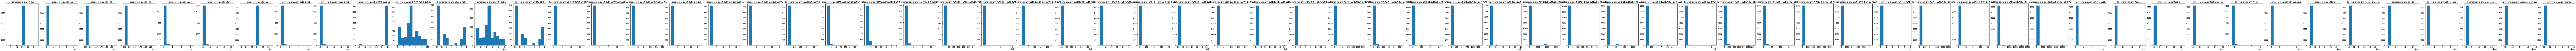

In [38]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1, len(numerics), figsize=(300, 5))
for i in range(len(numerics)):
    ax[i].set_title(f'Гисторгамма для {numerics[i]}')
    ax[i].hist(data1[numerics[i]])
plt.show()

<p>Просмотрев графики, можно сказать, что во всех колонках все довольно хорошо, нет сильных выбросов<p>

<h2>Отрисуем корреляцию признаков</h2>

In [39]:
import seaborn as sns

numerics.remove('IP_flag')
corr_data = data1.drop(columns=['IP_flag'])


corr_digit = corr_data[numerics].corr()
corr_digit

,F1210,F1600,F1700,F2110,F2120,F2410,F2110_LAG1,F2120_LAG1,EGRPOINCLUDED,OKATO_REGIONCODE,OKATO_FED,OKTMO_CODE,OKTMO_FED,COUNTCOOWNERFCSM,COUNTCOOWNERROSSTAT,COUNTCOOWNEREGRUL,COUNTBRANCH,COUNTBRANCHROSSTAT,COUNTBRANCHEGRUL,TELEPHONECOUNT,MANAGERCOUNTINCOUNTRY,MANAGERCOUNTINREGION,MANAGERINNCOUNT,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,Actives,Debt_all,Debt_previous,Profit,Profit_previous,Money,Money_previous,Capital,Obligatories,Expenses,Expenses_previous,Incomes
F1210,1.000000,0.302810,0.302807,0.428519,0.564467,0.054742,0.430636,0.558589,0.026846,0.009593,-0.088918,0.009001,-0.088918,0.218336,0.070610,-0.000503,0.101904,0.260226,0.452546,0.054413,-0.008318,0.010551,0.014029,-0.005116,0.152087,-0.015042,-0.005239,-0.020048,-0.010452,0.110450,-0.017358,-0.008110,-0.020741,-0.013498,-0.010722,-0.012561,-0.010040,0.026883,-0.014736,-0.007319,-0.011238,-0.009633,0.011291,0.023387,-0.028446,0.067325,0.069189,0.141424,-0.006130,-0.032180,0.008957,0.009801,0.117560,0.299887,0.585015,0.621506,0.175367,0.173030,0.247371,0.249578,0.223661,0.288255,0.117247,0.052917,0.212977
F1600,0.302810,1.000000,0.999998,0.729631,0.739705,-0.335043,0.743168,0.748230,0.021346,0.007421,-0.065664,0.007112,-0.065664,0.533401,0.181300,0.006826,0.725083,0.772984,0.519511,0.027736,-0.006330,-0.038315,-0.034292,-0.014701,0.004986,-0.010270,-0.004841,-0.017916,-0.017243,-0.000508,-0.016297,-0.006708,-0.020189,-0.016912,-0.017295,-0.014822,-0.016824,-0.016411,-0.024422,-0.021797,-0.022714,-0.023810,-0.014391,-0.018477,-0.026082,-0.015561,-0.014829,0.000363,-0.018262,-0.027290,-0.017586,-0.017378,-0.003505,0.997718,0.854155,0.792310,0.749478,0.841770,0.989906,0.985670,0.797201,0.897778,0.434379,0.303225,0.710400
F1700,0.302807,0.999998,1.000000,0.729661,0.739729,-0.335035,0.743198,0.748252,0.021352,0.007407,-0.065621,0.007097,-0.065621,0.533454,0.181380,0.006822,0.725080,0.772979,0.519506,0.027742,-0.006339,-0.038326,-0.034301,-0.014705,0.004982,-0.010272,-0.004843,-0.017921,-0.017248,-0.000512,-0.016302,-0.006711,-0.020195,-0.016917,-0.017300,-0.014827,-0.016829,-0.016417,-0.024429,-0.021804,-0.022721,-0.023817,-0.014396,-0.018484,-0.026089,-0.015568,-0.014836,0.000358,-0.018267,-0.027297,-0.017592,-0.017384,-0.003511,0.997716,0.854167,0.792322,0.749498,0.841776,0.989903,0.985667,0.797202,0.897778,0.434416,0.303268,0.710397
F2110,0.428519,0.729631,0.729661,1.000000,0.937555,-0.259447,0.997691,0.939134,0.036066,0.010772,-0.075616,0.010492,-0.075616,0.657121,0.311997,0.032897,0.624796,0.703826,0.579263,0.073385,-0.004353,-0.029815,-0.041439,-0.021289,0.038126,-0.017746,-0.009633,-0.029628,-0.025807,0.021775,-0.026825,-0.012963,-0.033425,-0.026758,-0.026556,-0.023885,-0.025839,-0.015915,-0.036411,-0.031549,-0.033792,-0.035127,-0.016127,-0.020807,-0.042877,-0.007652,-0.006250,0.030562,-0.026823,-0.045551,-0.022795,-0.022388,0.019690,0.712361,0.906363,0.873997,0.811638,0.625928,0.700983,0.702904,0.416585,0.781792,0.815287,0.730379,0.668362
F2120,0.564467,0.739705,0.739729,0.937555,1.000000,-0.205166,0.940903,0.996555,0.037954,0.011507,-0.076169,0.011290,-0.076169,0.714605,0.305745,0.025548,0.556457,0.706831,0.553312,0.067979,-0.021380,-0.047533,-0.044000,-0.021213,0.049040,-0.018539,-0.009329,-0.030434,-0.025839,0.029903,-0.027360,-0.012939,-0.033981,-0.027324,-0.026799,-0.024534,-0.026180,-0.012712,-0.036540,-0.031341,-0.033881,-0.035199,-0.013988,-0.018809,-0.044

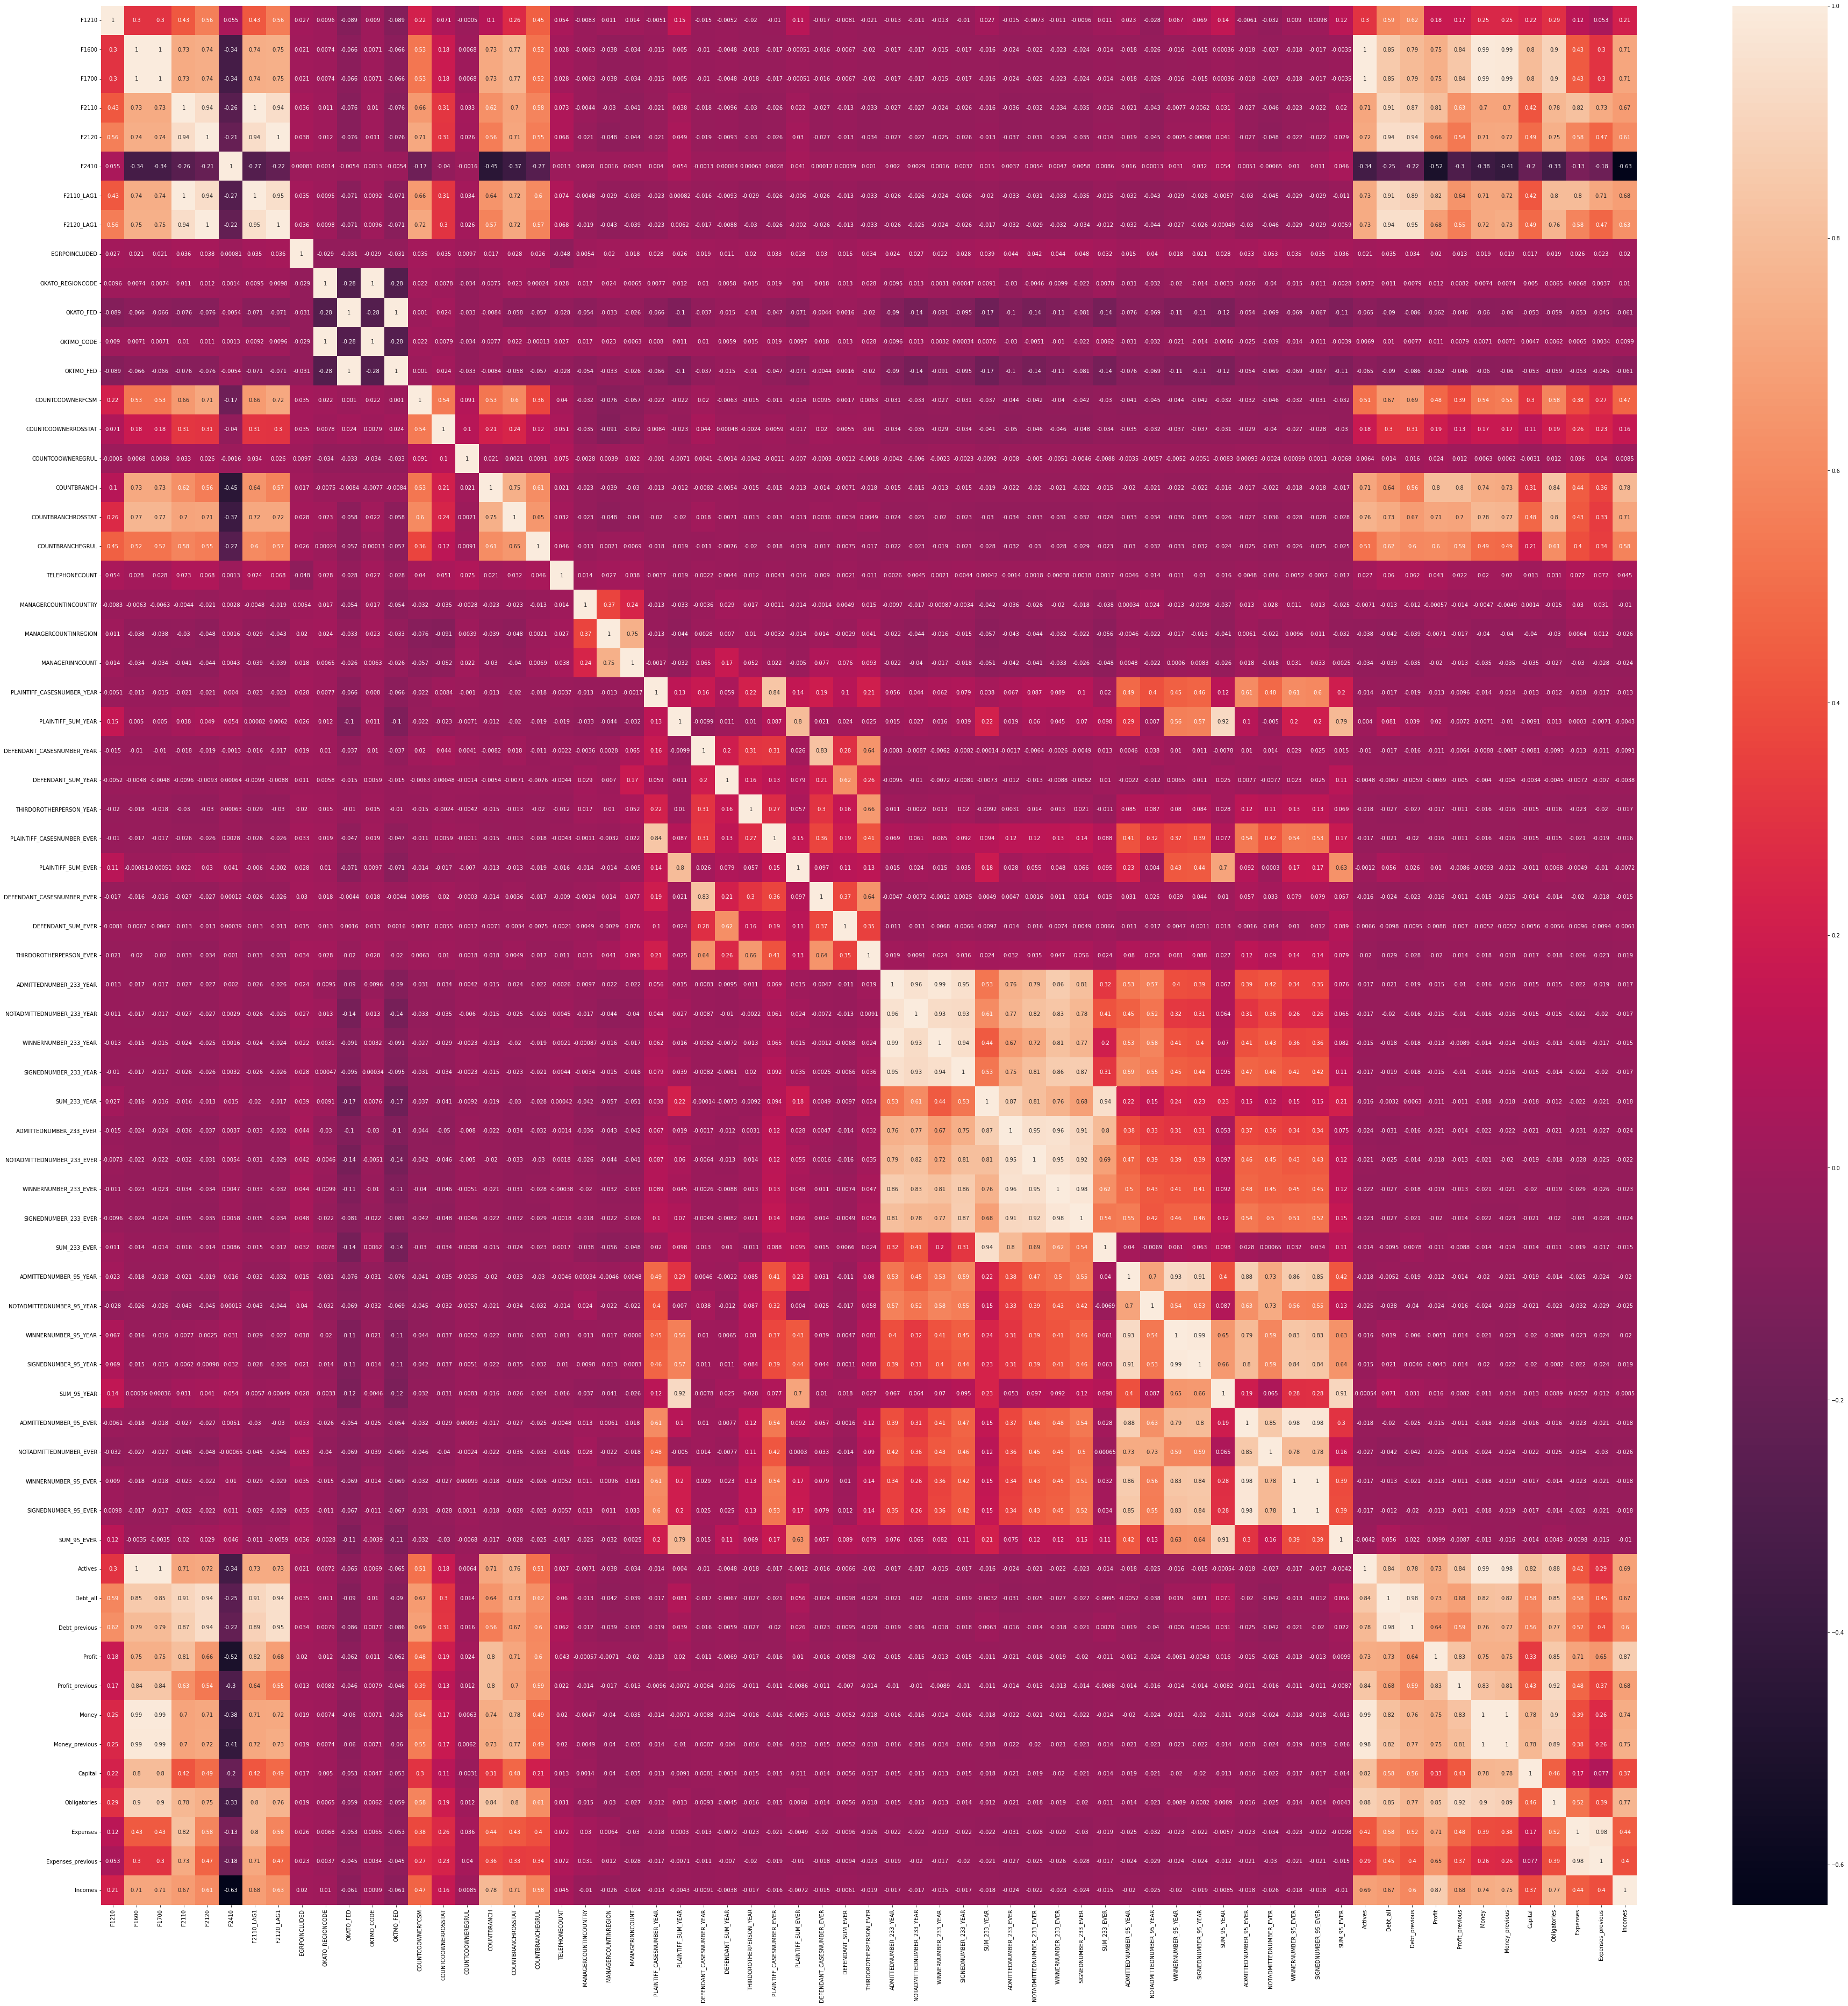

In [40]:
plt.figure(figsize=(len(numerics) - 1, 65))
sns.heatmap(corr_digit, annot=True)
plt.show()

<p>Здесь видно, что многие признаки очень сильно коррелирует. Это очень легко объяснимо. Например, структура компании сильно связана со всеми колонками, которые относятся к средствам, так как, чем больше у компании денег, тем больше у нее филиалов, так как компнаия растет и развивается.
Все созданные столбцы сильно коррелируют друг с другом, так как они тоже завязаны на деньгах. Также данные о госконтрактах коррелируют с данными о выигранных госконтрактах, так как одно прямо зависит от другого. Чем больше госконтрактов, тем больше выигрышей госконтрактов. Чем больше выигрышей, тем больше новых госконтрактов. Все столбцы, одинаоквые в названиях, которые различаются year и ever тоже сильно коррелируют, потому что они об одном и том же, но за разный промежуток времени.</p>

In [41]:
X = pd.concat([data1[numerics], dummies], axis=1)
X

,F1210,F1600,F1700,F2110,F2120,F2410,F2110_LAG1,F2120_LAG1,EGRPOINCLUDED,OKATO_REGIONCODE,OKATO_FED,OKTMO_CODE,OKTMO_FED,COUNTCOOWNERFCSM,COUNTCOOWNERROSSTAT,COUNTCOOWNEREGRUL,COUNTBRANCH,COUNTBRANCHROSSTAT,COUNTBRANCHEGRUL,TELEPHONECOUNT,MANAGERCOUNTINCOUNTRY,MANAGERCOUNTINREGION,MANAGERINNCOUNT,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,...,OKVED_CODE_85.22,OKVED_CODE_85.30,OKVED_CODE_85.41,OKVED_CODE_85.42,OKVED_CODE_85.42.1,OKVED_CODE_85.42.9,OKVED_CODE_86,OKVED_CODE_86.10,OKVED_CODE_86.21,OKVED_CODE_86.22,OKVED_CODE_86.23,OKVED_CODE_86.90,OKVED_CODE_86.90.1,OKVED_CODE_86.90.2,OKVED_CODE_86.90.4,OKVED_CODE_86.90.9,OKVED_CODE_87.90,OKVED_CODE_88.10,OKVED_CODE_90.0,OKVED_CODE_90.01,OKVED_CODE_90.03,OKVED_CODE_90.04,OKVED_CODE_93.11,OKVED_CODE_93.19,OKVED_CODE_93.2,OKVED_CODE_93.29,OKVED_CODE_93.29.9,OKVED_CODE_94.99,OKVED_CODE_95.1,OKVED_CODE_95.11,OKVED_CODE_95.12,OKVED_CODE_95.21,OKVED_CODE_95.22.1,OKVED_CODE_95.29.1,OKVED_CODE_96.0,OKVED_CODE_96.01,OKVED_CODE_96.03,OKVED_CODE_96.04,OKVED_CODE_96.09,OKVED_CODE_97.00
0,105901000.0,1.178183e+10,1.178183e+10,5.294104e+10,5.057016e+10,-19204000.0,4.955724e+10,4.648680e+10,1.0,3.0,40.0,3.701000e+09,40.0,5.0,1.0,0.0,8.0,7.0,7.0,3.0,0.0,0.0,0.0,1.0,139460.0,1.0,2000.0,0.0,2.0,360500.0,1.0,15948.0,0.0,8.0,1.0,4.0,3.0,1801037.5,15.0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2378000.0,9.498400e+07,9.498400e+07,5.218400e+07,4.286900e+07,302000.0,5.134000e+07,4.299900e+07,1.0,33.0,33.0,3.371000e+10,33.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,6.0,2762852.0,1.0,794.0,3.0,21.0,5408695.0,39.0,882647.0,4.0,1.0,0.0,1.0,1.0,1174998.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12001000.0,7.724453e+09,7.724453e+09,4.028466e+10,2.334412e+10,256172000.0,3.873078e+10,2.170760e+10,1.0,71.0,34.0,7.187600e+10,34.0,1.0,1.0,1.0,0.0,0.0,2.0,8.0,1.0,1.0,1.0,1.0,139460.0,1.0,2000.0,0.0,2.0,360500.0,1.0,15948.0,0.0,8.0,1.0,4.0,3.0,1801037.5,15.0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,467753000.0,3.454796e+10,3.454796e+10,1.613493e+10,1.457652e+10,-26769000.0,1.570123e+10,1.428982e+10,1.0,7.0,38.0,7.727000e+09,38.0,18.0,9.0,1.0,8.0,40.0,6.0,4.0,14.0,1.0,1.0,1.0,139460.0,1.0,2000.0,0.0,2.0,360500.0,1.0,15948.0,0.0,8.0,1.0,4.0,3.0,1801037.5,15.0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,137000.0,3.332350e+09,3.332350e+09,1.037751e+10,5.277033e+09,-29088000.0,9.481512e+09,5.061962e+09,1.0,12.0,40.0,1.270100e+10,40.0,5.0,9.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,139460.0,1.0,2000.0,0.0,2.0,360500.0,1.0,15948.0,0.0,8.0,1.0,4.0,3.0,1801037.5,15.0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398,4000.0,4.300000e+04,4.300000e+04,1.765200e+07,1.732500e+07,302000.0,1.799400e+07,1.794300e+07,1.0,60.0,40.0,6.072700e+10,40.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,139460.0,1.0,2000.0,0.0,2.0,360500.0,1.0,15948.0,0.0,1.0,0.0,1.0,1.0,580643.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7399,80000.0,1.967000e+06,1.967000e+06,1.423400e+07,1.900000e+04,302000.0,1.367000e+07,1.320400e+07,1.0,40.0,31.0,4.037300e+10,31.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,139460.0,1.0

In [42]:
y.value_counts()

0    3904
1    3499
Name: TARGET, dtype: int64

<h2>Делим данные на тестовую, валидационную и обучающую выборки для лучшей эффективности</h2>

In [43]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)



<h2>Данная задача является задачей на классификацию. нУжно предскать столбец Target, в котором всего два значения 1 или 0. Первым делом используем логистическую регресии. Посмотрим, как она себя проявит</h2>

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logress = LogisticRegression(C=15, l1_ratio=0.5, max_iter=1000)
logress.fit(X_train, y_train)

train_pred = logress.predict(X_train)
test_pred = logress.predict(X_test)
valid_pred = logress.predict(X_valid)

print('Train metrics:')
print(classification_report(train_pred, y_train))
print('-----------------')
print('Validation metrics:')
print(classification_report(valid_pred, y_valid))
print('-----------------')
print('Test metrics:')
print(classification_report(test_pred, y_test))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


Train metrics:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      2936
           1       0.73      0.69      0.71      2986

    accuracy                           0.72      5922
   macro avg       0.72      0.72      0.71      5922
weighted avg       0.72      0.72      0.71      5922

-----------------
Validation metrics:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       372
           1       0.74      0.70      0.72       368

    accuracy                           0.73       740
   macro avg       0.73      0.73      0.73       740
weighted avg       0.73      0.73      0.73       740

-----------------
Test metrics:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       359
           1       0.75      0.70      0.73       382

    accuracy                           0.73       741
   macro avg       0.73      0.73      0.73

<p>Результат довольно хороший. На всех выборках f1 примерно 70. Хороший результат для обычной логистической регресии без измененных параметров</p>

<h2>С помощью  pipeline и GridSearcCV попробуем перебрать все возможные варианты для логистической регресии и взять лучший. Также для численных данных будем использовать StandardScaler,  чтобы их нормализовать</h2>

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score


log_reg_pipe = Pipeline([('scaler', StandardScaler()), ('log_reg', LogisticRegression(max_iter=1000, C=15))])
log_reg_params = {
    'log_reg__penalty': ['l1','l2', 'elasticnet'],
    'log_reg__C': range(1, 40),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

log_reg_model = GridSearchCV(log_reg_pipe, log_reg_params)

log_reg_model.fit(X, y)

train_pred = log_reg_model.predict(X_train)
test_pred = log_reg_model.predict(X_test)
valid_pred = log_reg_model.predict(X_valid)

print('Train metrics:')
print(classification_report(train_pred, y_train))
print('-----------------')
print('Validation metrics:')
print(classification_report(valid_pred, y_valid))
print('-----------------')
print('Test metrics:')
print(classification_report(test_pred, y_test))

Train metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3121
           1       1.00      1.00      1.00      2801

    accuracy                           1.00      5922
   macro avg       1.00      1.00      1.00      5922
weighted avg       1.00      1.00      1.00      5922

-----------------
Validation metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       347

    accuracy                           1.00       740
   macro avg       1.00      1.00      1.00       740
weighted avg       1.00      1.00      1.00       740

-----------------
Test metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       387
           1       1.00      1.00      1.00       354

    accuracy                           1.00       741
   macro avg       1.00      1.00      1.00

<h2>Обучим модель DecisionTreeClassifier и проверим ее на тестовой выборке</h2>

In [615]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=50, 
                              random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       395
           1       0.84      0.86      0.85       346

    accuracy                           0.86       741
   macro avg       0.86      0.86      0.86       741
weighted avg       0.86      0.86      0.86       741



<p> f1 получился 0.86. Это очень хороший результат<p>

<h2>Попробуем еще одну модель для предсказания - KNeighborsClassifier</h2>

In [616]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski', leaf_size=10)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       395
           1       0.84      0.77      0.80       346

    accuracy                           0.82       741
   macro avg       0.82      0.82      0.82       741
weighted avg       0.82      0.82      0.82       741



<p>Тут f1 0.82, что тоже является хорошим результатом</p>

<h2>Вывод</h2>
<p>В данной задаче больше всего подходят деревья. Они выполняют предсказаняи лучше, чем обычная логистическая регресиия без измененных параметров. Также логистическая регрессия в какой-то момент выдала результат 1.0, но это очень странно, поэтому лучше использовать DecisionTreeClassifier. Обучение с большим изменением параметров в логистической регресии длилось 3 часа и ничего не дало</p>